In [1399]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from scipy.stats import norm, skew, stats
import statsmodels.api as sm


In [1473]:
# Load train and test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape: ', train.shape) # ((1460, 81))
print('test shape: ', test.shape) # (1459, 80)

train shape:  (1460, 81)
test shape:  (1459, 80)


### Data Exploration

In [1444]:
pd.set_option('display.max_columns', None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1292]:
# Summarize continuous variables
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1293]:
train_categorical = train.select_dtypes(include='object').columns
# train_continuous = train[train_categorical]

### Handling of Missing Data

In [1385]:
# Visualize missing data
# msno.matrix(train, labels=True)

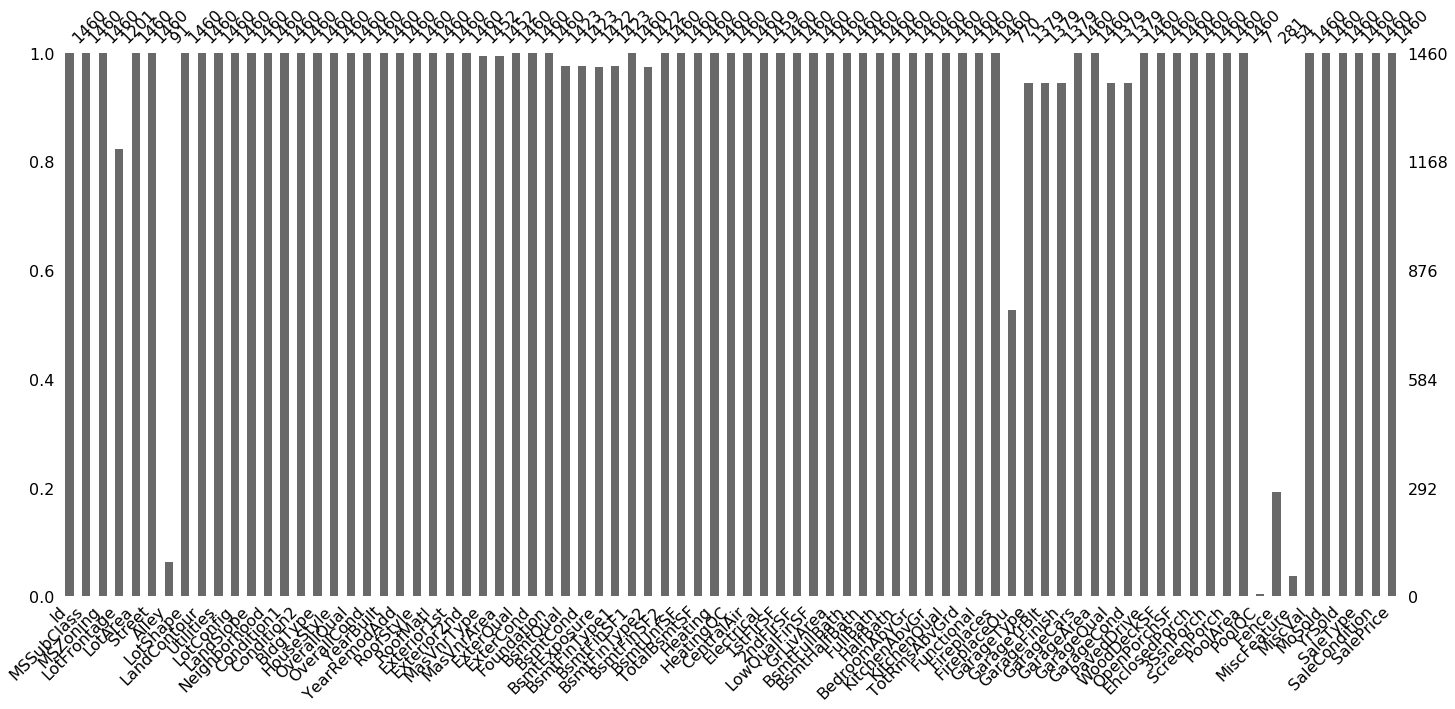

In [1295]:
msno.bar(train, labels=True)

In [1204]:
missing_sum = pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['missing rows'])
missing_percent = pd.DataFrame((train.isnull().sum()/len(train)*100).sort_values(ascending=False), columns=['percent missing'])
missing_data = pd.concat([missing_sum, missing_percent], axis = 1)
## Select only those features who have atleast 1 NaN value
missing_data = missing_data[missing_data['missing rows'] > 0]
missing_data


,missing rows,percent missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


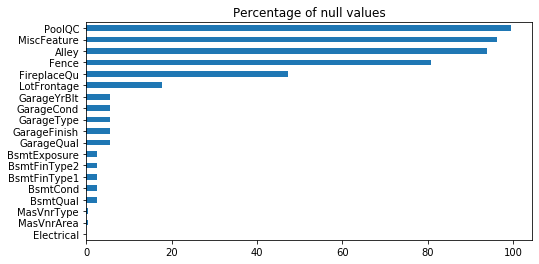

In [1205]:
## Plot a Horizontal Bar Graph
missing_data['percent missing'].sort_values().plot(kind='barh', figsize=(8,4), fontsize=10, title="Percentage of null values")
plt.show()

Text(0.5, 1.02, 'Correlation matrix')

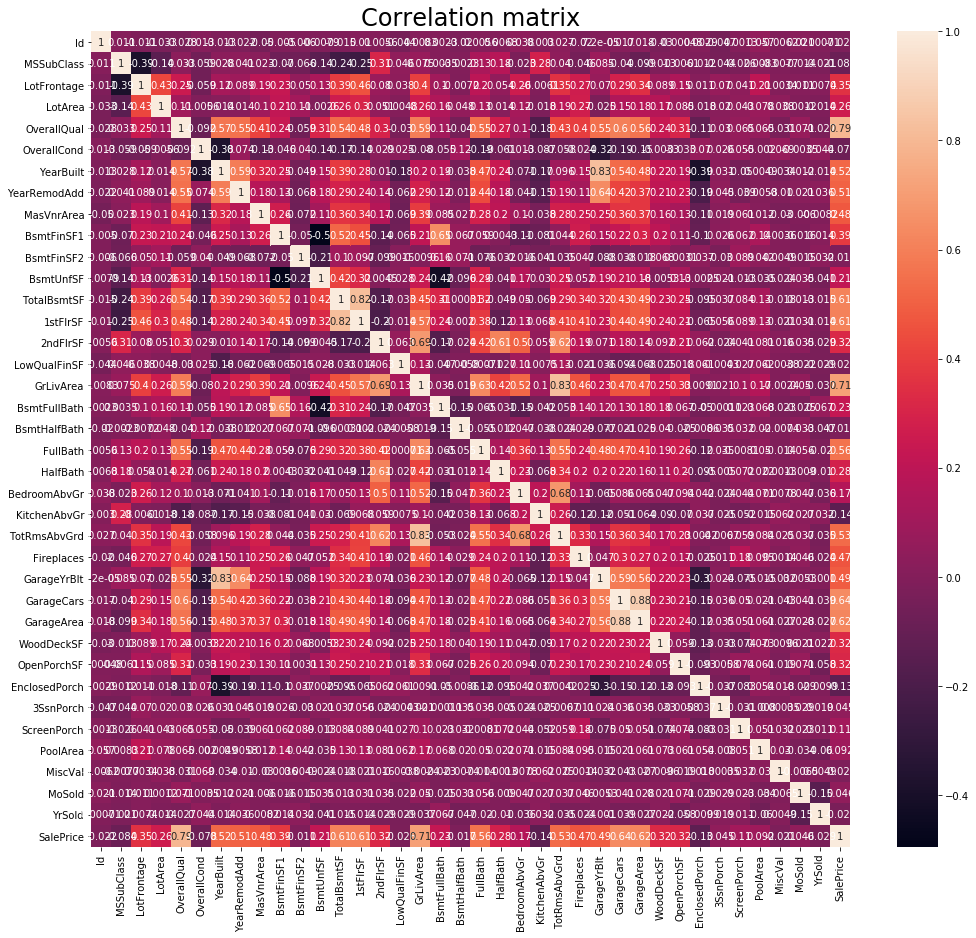

In [1206]:
var_corr = train.corr()
f, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True).set_title('Correlation matrix', fontsize=24, y=1.02)


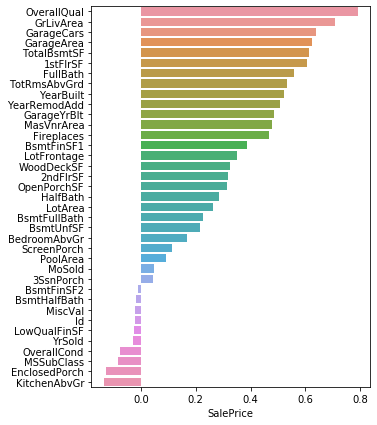

In [1472]:
price_corr = var_corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(5,7))
sns.barplot(price_corr.SalePrice[1:], price_corr.index[1:], orient='h')
plt.show()

In [1429]:
train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [1474]:
# The following are columns that have more than 10% missing data, we should consider deleting 
# Since PoolQC is poorly correlated with SalePrice, we can be safely delete it
# MiscFeature, Alley are not aspects we think about when buying a house, and will not be missed if deleted
# Since deleting MiscFeature, will also delete MiscVal
# Delete 3SsnPorch since it is poorly corr w/ SalePrice?
# Delete Id since it's irrelevant to this data set

del_features = ['Alley', 'Id', 'MiscFeature', 'MiscVal']

# Function to delete features that are not important
def delete_feature(df, features):
    for feature in features:
        df.drop(feature, axis=1, inplace=True)
    return df

train = delete_feature(train, del_features)
test = delete_feature(test, del_features)
print(train.shape)

(1460, 77)


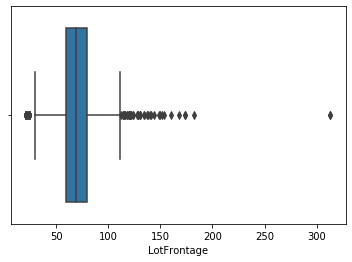

In [1475]:
# Check LotFrontage for outliars to determine if we should use mean or median to impute
# missing values
sns.boxplot(train['LotFrontage'])
# Since there are outliars, the mean would be skewed. We will impute with the median instead
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)

In [1476]:
# Since only one row is missing in Electrical, we can just delete it, and keep the column
# train = train.dropna(axis=0, subset = ['Electrical'])
# sum(train.Electrical.isnull())

# Impute missing Electrical value with mode value
mode_electrical = train.Electrical.value_counts().idxmax() # find index of max value
train['Electrical'].fillna(mode_electrical, inplace=True)
test['Electrical'].fillna(mode_electrical, inplace=True)

In [1477]:
# For the remaining categorical features with missing values, 
# we impute the missing values with string "None"
def fill_None(df, features):
    for feature in features:
        df[feature] = df[feature].fillna('None')
    return df

fillNone_features = ['PoolQC', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual']
train = fill_None(train, fillNone_features)
test = fill_None(test, fillNone_features)

In [1478]:
# Fill missing values in continuous features with 0
def fill_zero(df, features):
    for feature in features:
        df[feature] = df[feature].fillna(0)
    return df

fillZero_features = ['GarageYrBlt', 'GarageCars', 'GarageArea','MasVnrType','MasVnrArea']
train = fill_zero(train, fillZero_features)
test = fill_zero(test, fillZero_features)

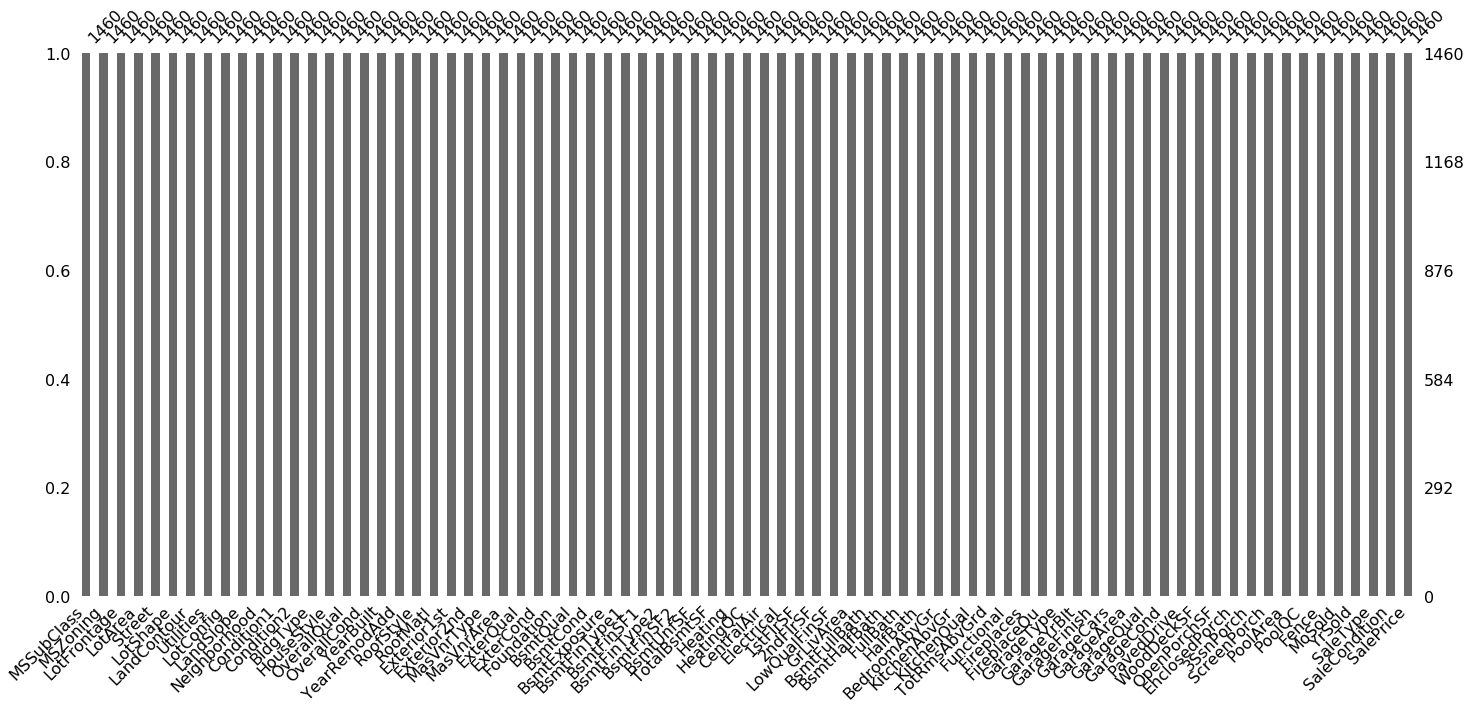

In [1479]:
msno.bar(train, labels=True)

In [1480]:
# GarageCar and GarageArea are pretty similar, may consider dropping one

### Handling of Outliers and Normality
- We'll explore each of the following features for outliers and normality: SalePrice, GrLivArea, and TotalBasmtSF

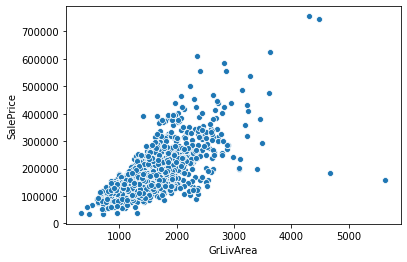

In [1364]:
sns.scatterplot(train['GrLivArea'], train['SalePrice'])
# The two points with highest GrLivArea are not aligned with the general plot

In [1365]:
train['GrLivArea'].sort_values(ascending=False)


1298    5642
523     4676
1182    4476
691     4316
1169    3627
        ... 
528      605
29       520
916      480
1100     438
533      334
Name: GrLivArea, Length: 1460, dtype: int64

In [1366]:
# Delete rows with outliers
# train = train.loc[train['GrLivArea'] < 4500]
# train.shape
# sns.distplot(train['SalePrice'], fit=norm)

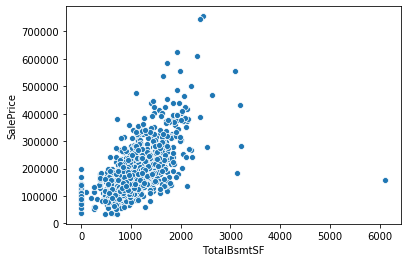

In [1367]:
sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])

1.880940746034036

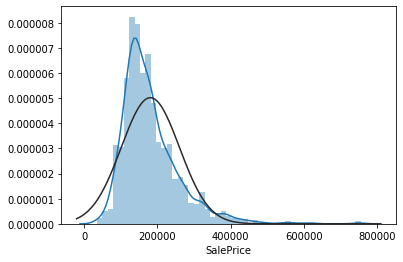

In [1368]:
# histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)
skew(train['SalePrice'])


In [1369]:
# train['SalePrice'] = np.log(train['SalePrice'])
# sns.distplot(train['SalePrice'], fit=norm)

1.365155954773434

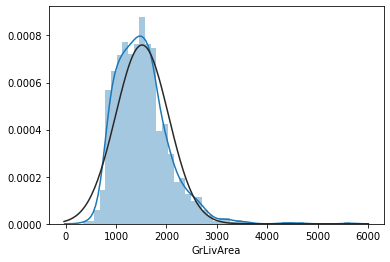

In [1370]:
sns.distplot(train['GrLivArea'], fit=norm)
skew(train['GrLivArea'])

In [1371]:
# train['GrLivArea'] = np.log(train['GrLivArea'])
# sns.distplot(train['GrLivArea'], fit=norm)

1.522688086978629

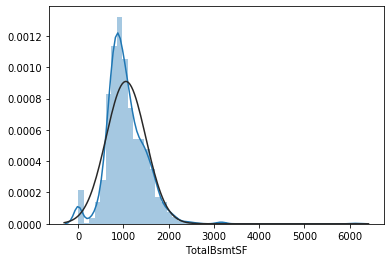

In [1372]:
sns.distplot(train['TotalBsmtSF'], fit=norm)
skew(train['TotalBsmtSF'])

In [1373]:
# train['TotalBsmtSF'] = np.log1p(train['TotalBsmtSF'])
# sns.distplot(train['TotalBsmtSF'], fit=norm)

### Feature Engineering

In [1481]:
# Usually we talk about the total area (sqft) of the house rather than individual areas.
# Create a new feature to sums up all the areas to get the total area
# GrLivA = 1stFlrSF + 2ndFlrSF, drop?
def feat_engineering(df):
    df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']

    # Total Square Footage
    df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df['3SsnPorch'] + df.ScreenPorch
    
    # Total Bathrooms
    df['TotalBathrooms'] = df.FullBath + .5*df.HalfBath + df.BsmtFullBath + .5*df.BsmtHalfBath

    # The Year features can be combined to give us the age of the house when it was sold instead
    # Drop MoSold, YrSold?
    df['Age'] = df['YrSold'] - df['YearBuilt']

    return df

train = feat_engineering(train)
test = feat_engineering(test)

# Delete features no longer needed
del_features = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'OpenPorchSF', \
                'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'EnclosedPorch', \
                '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold']
train = delete_feature(train, del_features)
test = delete_feature(test, del_features)
train.shape

(1460, 67)

In [1482]:
# Heating Quality and Condition

# Function replaces strings with ordinal values

def replace_ordinal(df, features):
    for feature in features:
        df[feature].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    return df

features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond'] 
train = replace_ordinal(train, features)
test = replace_ordinal(test, features)

In [1483]:
# Finished Basement 2 Rating
def replace_ordinal2(df, features):
    for feature in features:
        df[feature].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
    return df

features = ['BsmtFinType1', 'BsmtFinType2'] 
train = replace_ordinal2(train, features)
test = replace_ordinal2(test, features)

In [1484]:
def replace_ordinal3(df):
    df.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

    df.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

    df.HouseStyle.replace({'2Story': 2, '1Story': 1}, inplace=True)

    df.BsmtExposure.replace({'No':0, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

    df.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

    df.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

    # Fill NA values with zeroes
    df = fill_zero(df, ['LotShape', 'LandSlope', 'BsmtExposure', 'GarageFinish', 'PavedDrive'])
    return df

train = replace_ordinal3(train)
test = replace_ordinal3(test)

In [1485]:
print('train shape:', train.shape)
print('test shape:', test.shape)
train.head()

train shape: (1460, 67)
test shape: (1459, 66)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBathrooms,Age
0,60,RL,65.0,8450,Pave,1,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,0,6,706,1,0,150,GasA,5,Y,SBrkr,0,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,3,0,0,None,None,WD,Normal,208500,2566,61,3.5,5
1,20,RL,80.0,9600,Pave,1,Lvl,AllPub,FR2,3,Veenker,Feedr,Norm,1Fam,1,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,GasA,5,Y,SBrkr,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,3,298,0,None,None,WD,Normal,181500,2524,0,2.5,31
2,60,RL,68.0,11250,Pave,2,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,GasA,5,Y,SBrkr,0,3,1,4,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,3,0,0,None,None,WD,Normal,223500,2706,42,3.5,7
3,70,RL,60.0,9550,Pave,2,Lvl,AllPub,Corner,3,Crawfor,Norm,Norm,1Fam,2,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,0,5,216,1,0,540,GasA,4,Y,SBrkr,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,3,0,0,None,None,WD,Abnorml,140000,2473,307,2.0,91
4,60,RL,84.0,14260,Pave,2,Lvl,AllPub,FR2,3,NoRidge,Norm,Norm,1Fam,2,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,GasA,5,Y,SBrkr,0,4,1,4,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,3,192,0,None,None,WD,Normal,250000,3343,84,3.5,8


In [1486]:
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)